<a href="https://colab.research.google.com/github/vineetbiyani09/NLP/blob/master/NLP_9_emails_Word2Vec_J010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from gensim.models import Word2Vec
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sentences = [['i', 'like', 'apple', 'pie', 'for', 'dessert'],
            ['i', 'dont', 'drive', 'fast', 'cars'],
            ['data', 'science', 'is', 'fun'],
            ['chocolate', 'is', 'my', 'favorite'],
            ['my', 'favorite', 'movie', 'is', 'predator']]

In [ ]:

# train word2vec model
w2v = Word2Vec(sentences, min_count=1, size = 5)
print(w2v)


Word2Vec(vocab=19, size=5, alpha=0.025)


In [ ]:
# summarize vocabulary
words1 = list(w2v.wv.vocab)
print(words1)
w2v.wv.vocab

['i', 'like', 'apple', 'pie', 'for', 'dessert', 'dont', 'drive', 'fast', 'cars', 'data', 'science', 'is', 'fun', 'chocolate', 'my', 'favorite', 'movie', 'predator']


{'apple': <gensim.models.keyedvectors.Vocab at 0x7f86b5187ad0>,
 'cars': <gensim.models.keyedvectors.Vocab at 0x7f86b5187bd0>,
 'chocolate': <gensim.models.keyedvectors.Vocab at 0x7f86b5187dd0>,
 'data': <gensim.models.keyedvectors.Vocab at 0x7f86b5187cd0>,
 'dessert': <gensim.models.keyedvectors.Vocab at 0x7f86b5187c10>,
 'dont': <gensim.models.keyedvectors.Vocab at 0x7f86b5187c50>,
 'drive': <gensim.models.keyedvectors.Vocab at 0x7f86b5187c90>,
 'fast': <gensim.models.keyedvectors.Vocab at 0x7f86b5187b50>,
 'favorite': <gensim.models.keyedvectors.Vocab at 0x7f86b5187e50>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f86b5187b90>,
 'fun': <gensim.models.keyedvectors.Vocab at 0x7f86b5187d90>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7f86b5187a50>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f86b5187d50>,
 'like': <gensim.models.keyedvectors.Vocab at 0x7f86b5187a90>,
 'movie': <gensim.models.keyedvectors.Vocab at 0x7f86b5187e90>,
 'my': <gensim.models.keyedvectors.Vocab at 0x7

In [ ]:
# access vector for one word
print(w2v['chocolate'])


[ 0.06782705 -0.03842463 -0.03979376  0.02236286 -0.04641231]


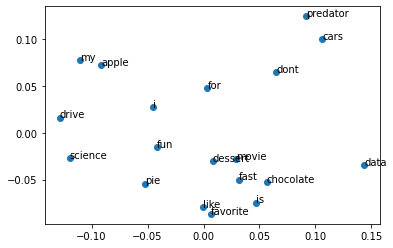

In [ ]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# X = ft[ft.wv.vocab]
# pca = PCA(n_components=2)

# result = pca.fit_transform(X)

# # create a scatter plot of the projection
# plt.scatter(result[:, 0], result[:, 1])
# words = list(ft.wv.vocab)

# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/emails.csv')
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
clean_txt = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    clean_txt.append(desc)

df['clean'] = clean_txt

In [ ]:
df.head()

,text,spam,clean
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is ...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fro...


In [ ]:
corpus = []
for col in df.clean:
    word_list = col.split(" ")
    corpus.append(word_list)
corpus[0:1]

[['subject',
  'naturally',
  'irresistible',
  'your',
  'corporate',
  'identity',
  'lt',
  'is',
  'really',
  'hard',
  'to',
  'recollect',
  'a',
  'company',
  'the',
  'market',
  'is',
  'full',
  'of',
  'suqgestions',
  'and',
  'the',
  'information',
  'isoverwhelminq',
  'but',
  'a',
  'good',
  'catchy',
  'logo',
  'stylish',
  'statlonery',
  'and',
  'outstanding',
  'website',
  'will',
  'make',
  'the',
  'task',
  'much',
  'easier',
  'we',
  'do',
  'not',
  'promise',
  'that',
  'havinq',
  'ordered',
  'a',
  'iogo',
  'your',
  'company',
  'will',
  'automaticaily',
  'become',
  'a',
  'world',
  'ieader',
  'it',
  'isguite',
  'ciear',
  'that',
  'without',
  'good',
  'products',
  'effective',
  'business',
  'organization',
  'and',
  'practicable',
  'aim',
  'it',
  'will',
  'be',
  'hotat',
  'nowadays',
  'market',
  'but',
  'we',
  'do',
  'promise',
  'that',
  'your',
  'marketing',
  'efforts',
  'will',
  'become',
  'much',
  'more',
  

In [ ]:
model = Word2Vec(corpus, min_count=1, size = 56)

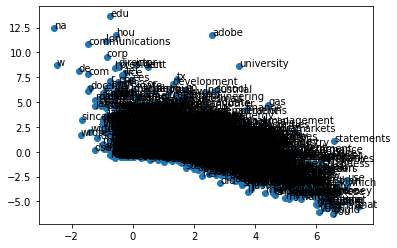

In [ ]:
X = model[model.wv.vocab]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create df from the pca results
pca_df = pd.DataFrame(result, columns = ['x','y'])

#add the words for the hover effect
pca_df['word'] = words
pca_df.head()

,x,y,word
0,0.321016,2.459371,subject
1,0.251754,0.111045,naturally
2,-0.176125,-0.163997,irresistible
3,6.100686,-6.029081,your
4,2.370428,2.301035,corporate


In [ ]:
N = 1000000
words = list(model.wv.vocab)
fig = go.Figure(data=go.Scattergl(
    x = pca_df['x'],
    y = pca_df['y'],
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    ),
    text=pca_df['word'],
    textposition="bottom center"
))

fig.show()

In [ ]:
model.wv.most_similar('eric')

[('nelson', 0.9378228187561035),
 ('kenneth', 0.9220072031021118),
 ('lee', 0.9212491512298584),
 ('dave', 0.918833315372467),
 ('corey', 0.9118856191635132),
 ('oberg', 0.9086427688598633),
 ('woo', 0.9083635807037354),
 ('joe', 0.9077290892601013),
 ('bob', 0.9072172045707703),
 ('gadd', 0.9061684012413025)]

In [ ]:
model.wv.most_similar('start')

[('try', 0.8065423369407654),
 ('sign', 0.8063201308250427),
 ('come', 0.7977481484413147),
 ('bring', 0.796528160572052),
 ('stay', 0.7879793643951416),
 ('move', 0.779120922088623),
 ('put', 0.7779364585876465),
 ('getting', 0.7752783298492432),
 ('take', 0.771009087562561),
 ('get', 0.7677476406097412)]

In [ ]:
model.wv.most_similar_cosmul(positive = ['phone', 'number'], negative = ['call'])

[('exclusivity', 1.0858776569366455),
 ('address', 1.0538607835769653),
 ('emarketer', 1.034356951713562),
 ('phonemail', 1.0244102478027344),
 ('cell', 1.0228484869003296),
 ('mtholyoke', 1.015142560005188),
 ('daytime', 1.0043160915374756),
 ('name', 0.9994606971740723),
 ('machine', 0.9972172975540161),
 ('cognizant', 0.9930146336555481)]

In [ ]:
model.wv.doesnt_match("phone number prison cell".split())

'prison'

In [ ]:
#save embeddings
file = 'email_embd.txt'
model.wv.save_word2vec_format(file, binary = False)

In [ ]:
import nltk

class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [ ]:
nltk.download('punkt')
mean_embedding_vectorizer = MeanEmbeddingVectorizer(model)
mean_embedded = mean_embedding_vectorizer.fit_transform(df['clean'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
mean_embedded[0]

array([ 0.21176162, -0.34203157,  1.2826957 , -0.8068269 , -0.8316661 ,
       -0.03515909,  0.11728024, -0.16277163, -0.8255573 , -0.12051164,
        0.6129306 ,  0.47823128, -0.2399229 ,  0.9223644 , -1.4513757 ,
       -0.71021044, -1.2829077 , -1.0780057 ,  1.226163  , -0.395847  ,
        0.0690077 , -0.7470191 , -0.5676103 ,  0.5400749 ,  0.56280506,
        0.55272484, -0.62960213,  0.66874796,  0.47662285, -0.21996373,
       -0.44754103,  0.5821144 ,  0.05115377, -0.75659406, -0.35832134,
       -0.6396286 , -0.3641439 ,  0.02082095, -0.94558185,  0.02181058,
       -1.5304791 , -0.24670877, -0.18566222, -0.3262796 , -0.43497062,
       -0.33961508,  0.03009694, -0.3080494 ,  0.272531  , -0.22246312,
        0.13830653,  0.13107796, -0.17101613,  0.27076894, -0.75824577,
        0.504922  ], dtype=float32)

In [ ]:
df['array'] = list(mean_embedded)
df

,text,spam,clean,array
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...,"[0.21176162, -0.34203157, 1.2826957, -0.806826..."
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is ...,"[-0.0025425185, -0.14505138, 0.7255452, -0.468..."
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...,"[0.09227929, -0.5833881, 1.3070959, -0.7243193..."
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...,"[0.24681394, -0.14307979, 0.64264685, -0.54897..."
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fro...,"[-0.49776492, -0.23076685, 1.0595285, -0.78966..."
...,...,...,...,...
5723,Subject: re : research and development charges...,0,subject re research and development charges to...,"[-0.36355987, 0.20365159, 0.20887329, -1.20538..."
5724,"Subject: re : receipts from visit jim , than...",0,subject re receipts from visit jim thanks agai...,"[0.16848873, -0.29650018, 0.010551807, -0.7638..."
5725,Subject: re : enron case study update wow ! a...,0,subject re enron case study update wow all on ...,"[-0.30222207, -0.44878697, 0.59813803, -1.0497..."
5726,"Subject: re : interest david , please , call...",0,subject re interest david please call shirley ...,"[-0.31626546, -0.03382985, -0.21419391, -1.161..."
